## Waste Management Using CNN Model

In [2]:
#pip install opencv-python

In [3]:
#pip install tensorflow

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_path= "DATASET\TRAIN"
test_path= "DATASET\TEST"

In [6]:
# importing library 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
#Visualization 
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array = cv2.resize(img_array, (150, 150))
        x_data.append(img_array)
        y_data.append(category.split('\\')[-1])

data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [02:20<00:00, 71.13it/s]


In [8]:
data.shape

(22564, 2)

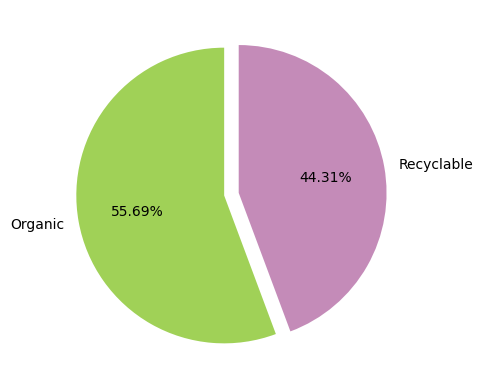

In [9]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',colors=colors, startangle=90, explode=(0.05, 0.05))
plt.show()

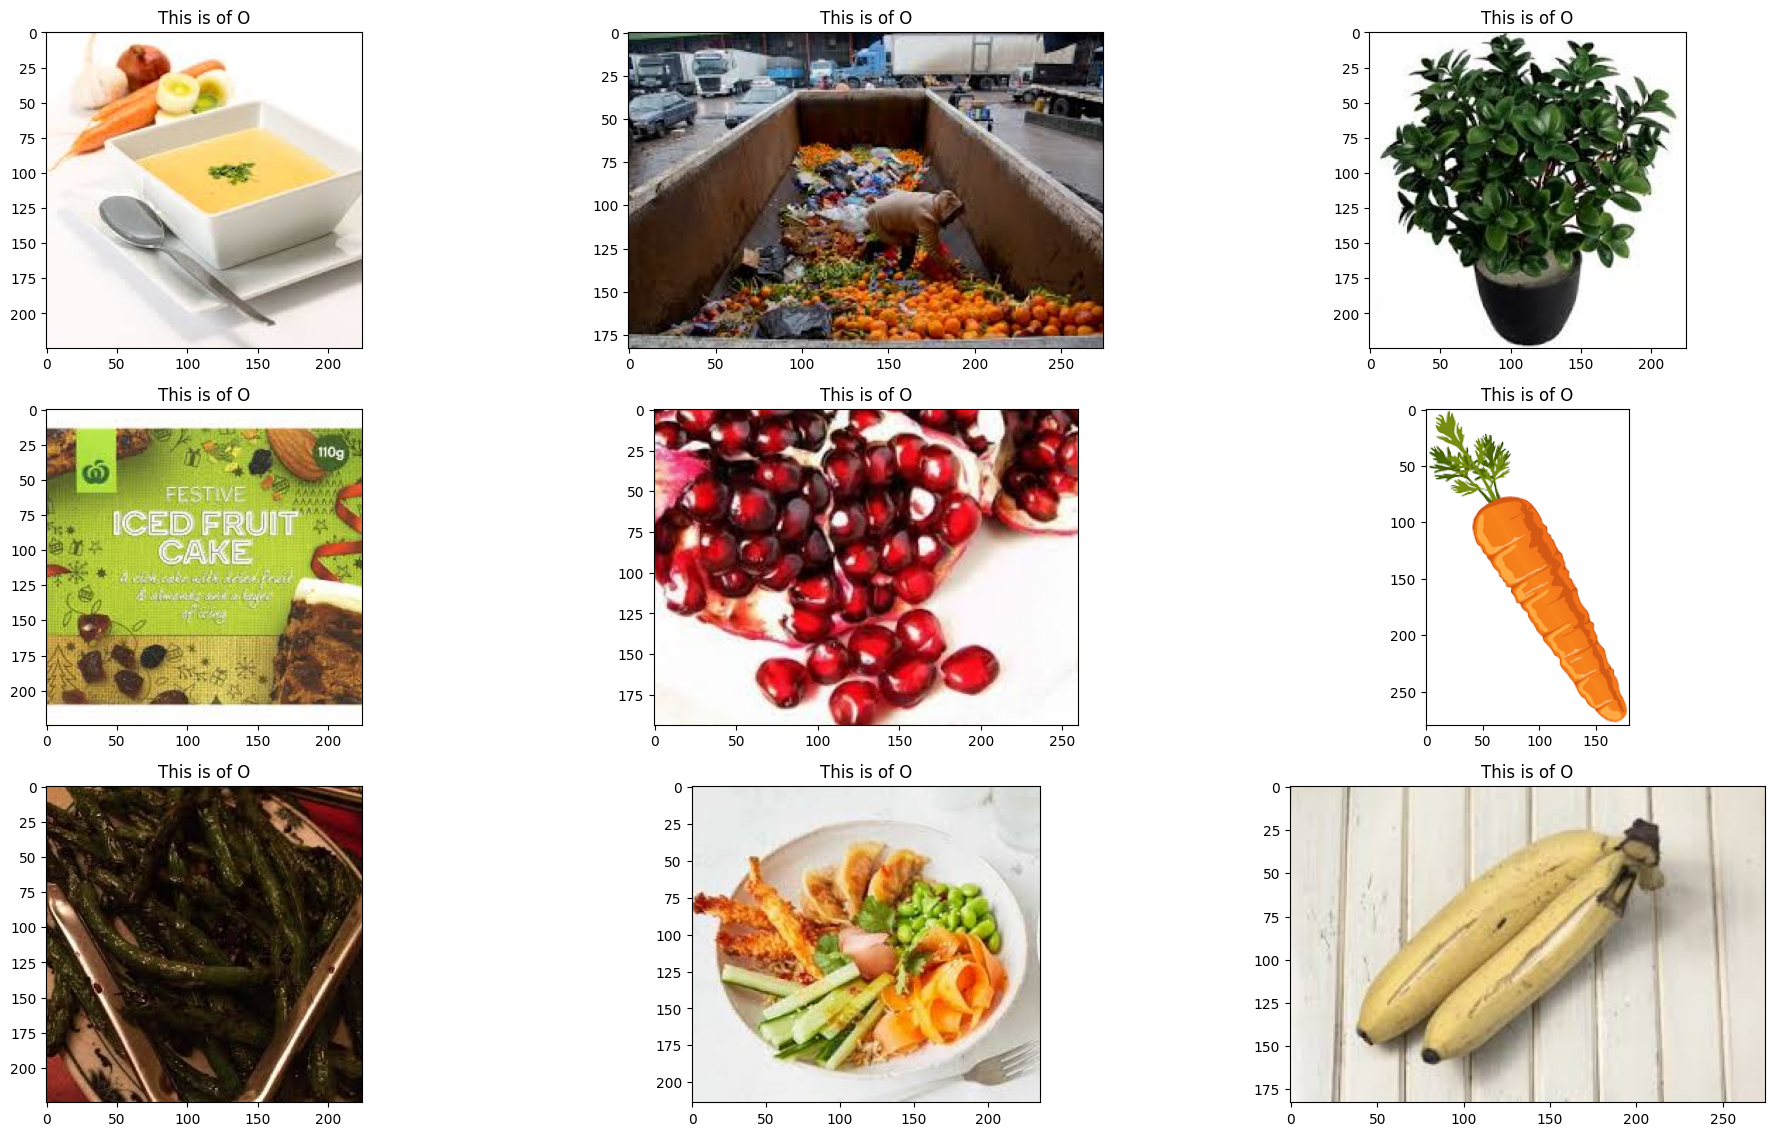

In [10]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    
    
    plt.title("This is of {0}".format(data.label[index]), )
    plt.imshow(data.image[index])
    plt.tight_layout()
    

## CNN- Convolutional Neural Network

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3),  input_shape=(224, 224, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 64


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory( train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', color_mode='rgb')
test_generator = test_datagen.flow_from_directory( test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', color_mode='rgb')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist = model.fit(train_generator,  epochs=10, validation_data=test_generator,  steps_per_epoch=200//batch_size, validation_steps=800//batch_size)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 17s/step - accuracy: 0.4740 - loss: 0.8511 - val_accuracy: 0.5339 - val_loss: 0.6610
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 14s/step - accuracy: 0.5430 - loss: 0.6857 - val_accuracy: 0.7500 - val_loss: 0.6139
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 14s/step - accuracy: 0.6647 - loss: 0.6366 - val_accuracy: 0.7565 - val_loss: 0.5299
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 12s/step - accuracy: 0.7500 - loss: 0.5332 - val_accuracy: 0.8581 - val_loss: 0.4251
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 12s/step - accuracy: 0.6953 - loss: 0.5717 - val_accuracy: 0.8398 - val_loss: 0.4292
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 12s/step - accuracy: 0.6927 - loss: 0.5649 - val_accuracy: 0.8529 - val_loss: 0.4251
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 11s/step - accuracy: 0.7474 - loss: 0.5765 - val_accuracy: 0.8568 - val_loss: 0.4073
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 12s/step - accuracy: 0.7982 - loss: 0.4992 - val_accuracy: 0.8099 - val_loss: 0.4468


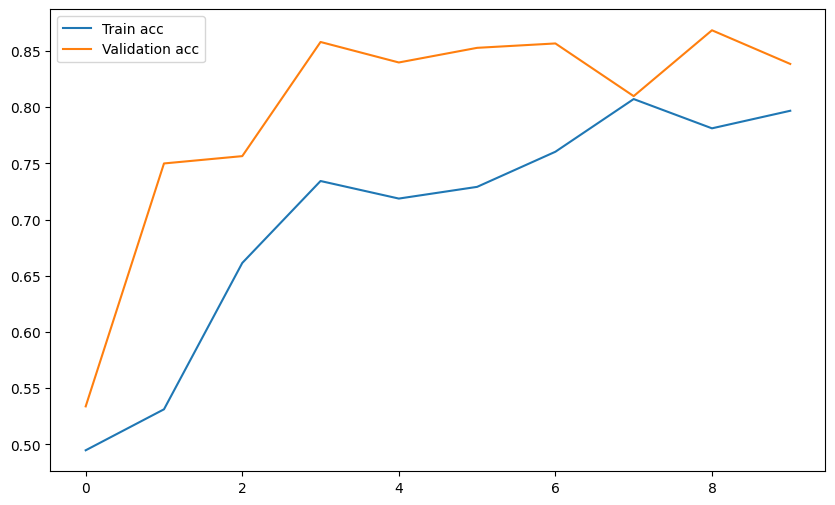

In [17]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

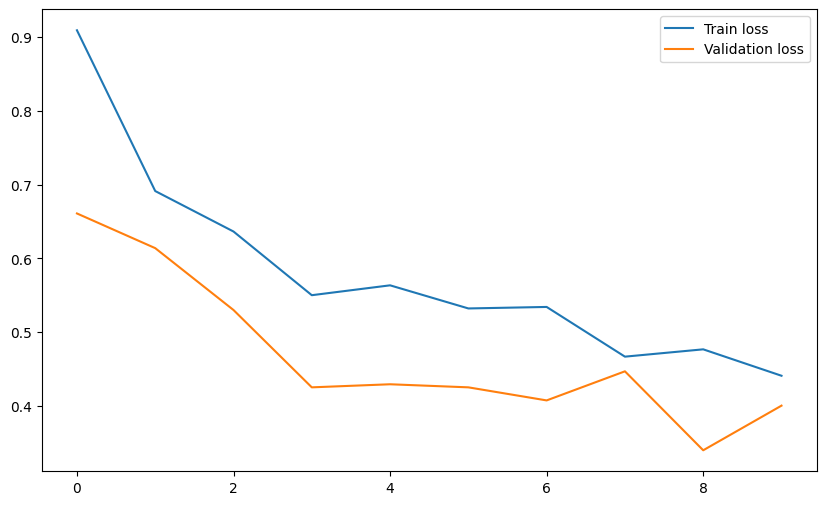

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [20]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
This image shows organic waste


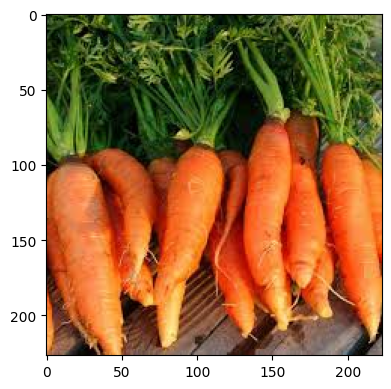

In [22]:
test_img = cv2.imread("DATASET\TEST\O\O_12568.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
This image shows recyclable waste


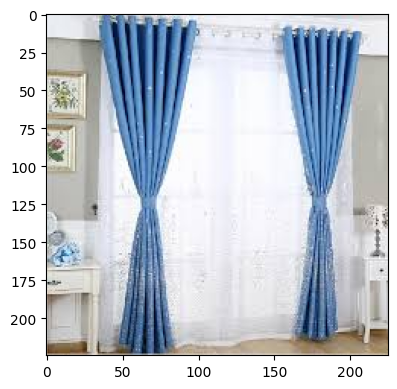

In [23]:
test_img = cv2.imread("DATASET\TEST\R\R_10001.jpg")
predict_func(test_img)